In [1]:
import seaborn
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from collections import Counter

try:
    import constants as c
except ImportError:
    c = None
    raise ImportError('constants' + ' not imported')

try:
    import visualisation_fn as v
except ImportError:
    c = None
    raise ImportError('visualisation_fn' + ' not imported')

In [2]:
N_MOST_COMMON = c.N_MOST_COMMON
PATH_TO_PICKLE = c.PATH_TO_PICKLE

# Exemple sur un paragraphe random

In [3]:
t_p = v.TextProcessing(PATH_TO_PICKLE)

on load la liste des sequences dans l'objet TextProcessing

In [4]:
t_p.load()

extraction done
extraction done
extraction done


In [5]:
t_p.prepare()

In [6]:
t_p.text[:15]

'la relativité g'

In [7]:
t_p.text_split[:15]

['la',
 'relativité',
 'générale',
 'est',
 'une',
 'théorie',
 'relativiste',
 'de',
 'la',
 'gravitation,',
 "c'est-à-dire",
 "qu'elle",
 'décrit',
 "l'influence",
 'de']

# Fréquences

In [8]:
sorted_cardinalities = v.cardinality_of_words(t_p.text_split)

In [9]:
common_words = list(sorted_cardinalities.items())[:N_MOST_COMMON]

In [10]:
common_words[:15]

[('la', 14),
 ('de', 12),
 ('et', 6),
 ('relativité', 4),
 ('générale', 3),
 ('est', 3),
 ('théorie', 3),
 ('le', 3),
 ('des', 3),
 ('qui', 3),
 ('en', 2),
 ('aux', 2),
 ('à', 2),
 ('elle', 2),
 ('une', 1)]

In [11]:
words = [w[0] for w in common_words]
counts = [w[1] for w in common_words]

## Premier affichage

Text(0.5, 1.0, 'Most Common Words in this wikipedia samples')

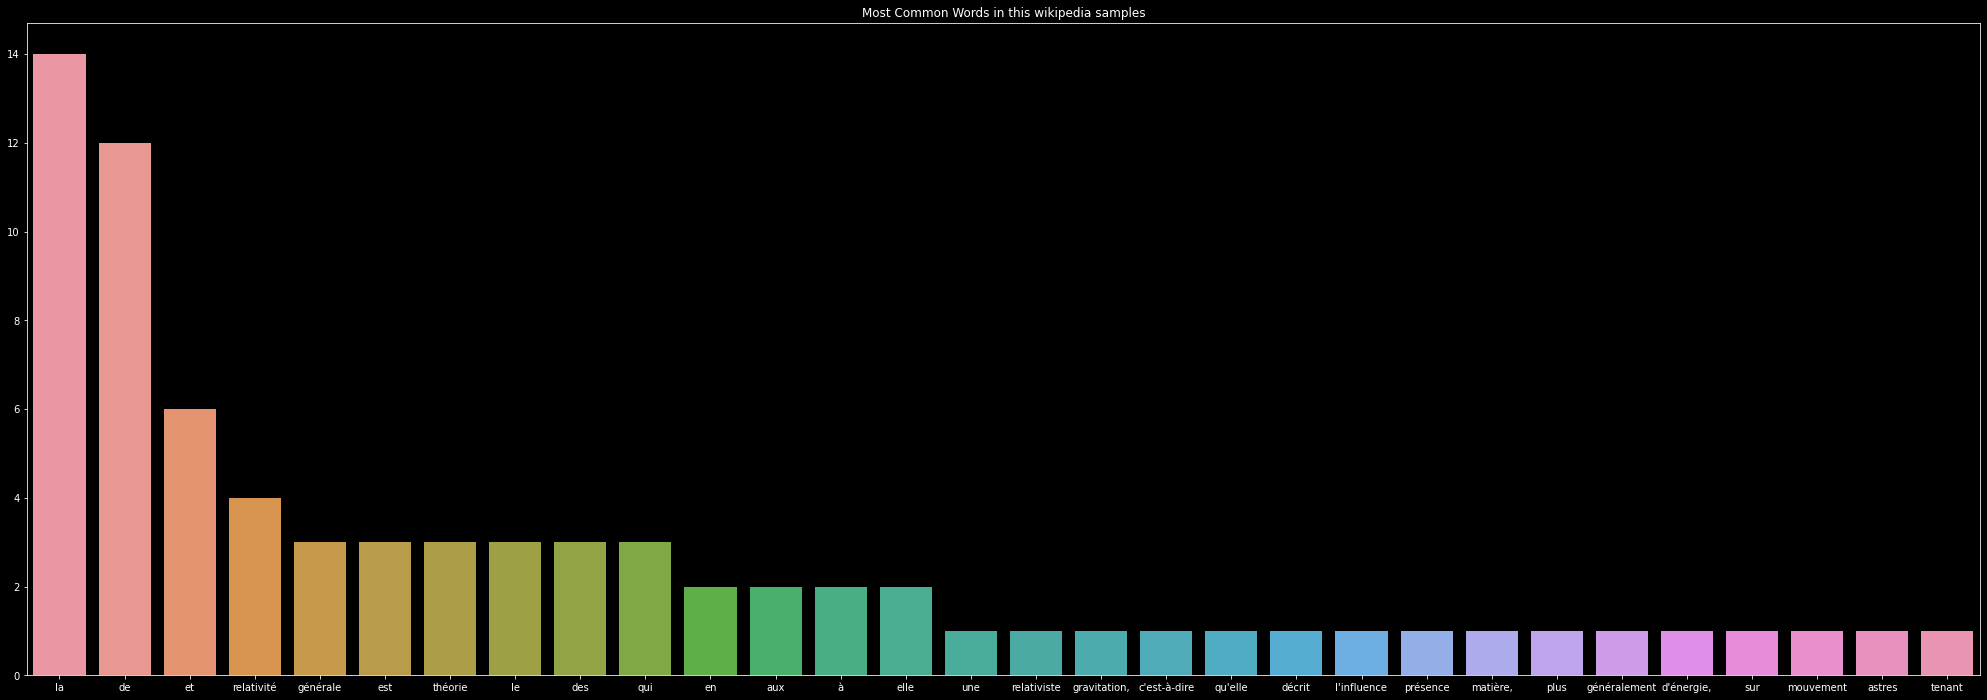

In [13]:
plt.style.use('dark_background')
plt.figure(figsize=(35, 12))

seaborn.barplot(x = words, y = counts)
plt.title('Most Common Words in this wikipedia samples')

## Suppression des stopwords avec nltk

In [14]:
text_without_stopwords = t_p.without_stopwords()

In [15]:
text_without_stopwords[:6]

['relativité',
 'générale',
 'théorie',
 'relativiste',
 'gravitation,',
 "c'est-à-dire"]

pour plus d'efficacité on utilise la fonction Counter de Collection

In [16]:
cardinalities = Counter(text_without_stopwords)

In [17]:
words = [cardinality[0] for cardinality in cardinalities.most_common(N_MOST_COMMON)]
counts = [cardinality[1] for cardinality in cardinalities.most_common(N_MOST_COMMON)]

## Second affichage

Text(0.5, 1.0, 'Most Common Words in this wikipedia samples')

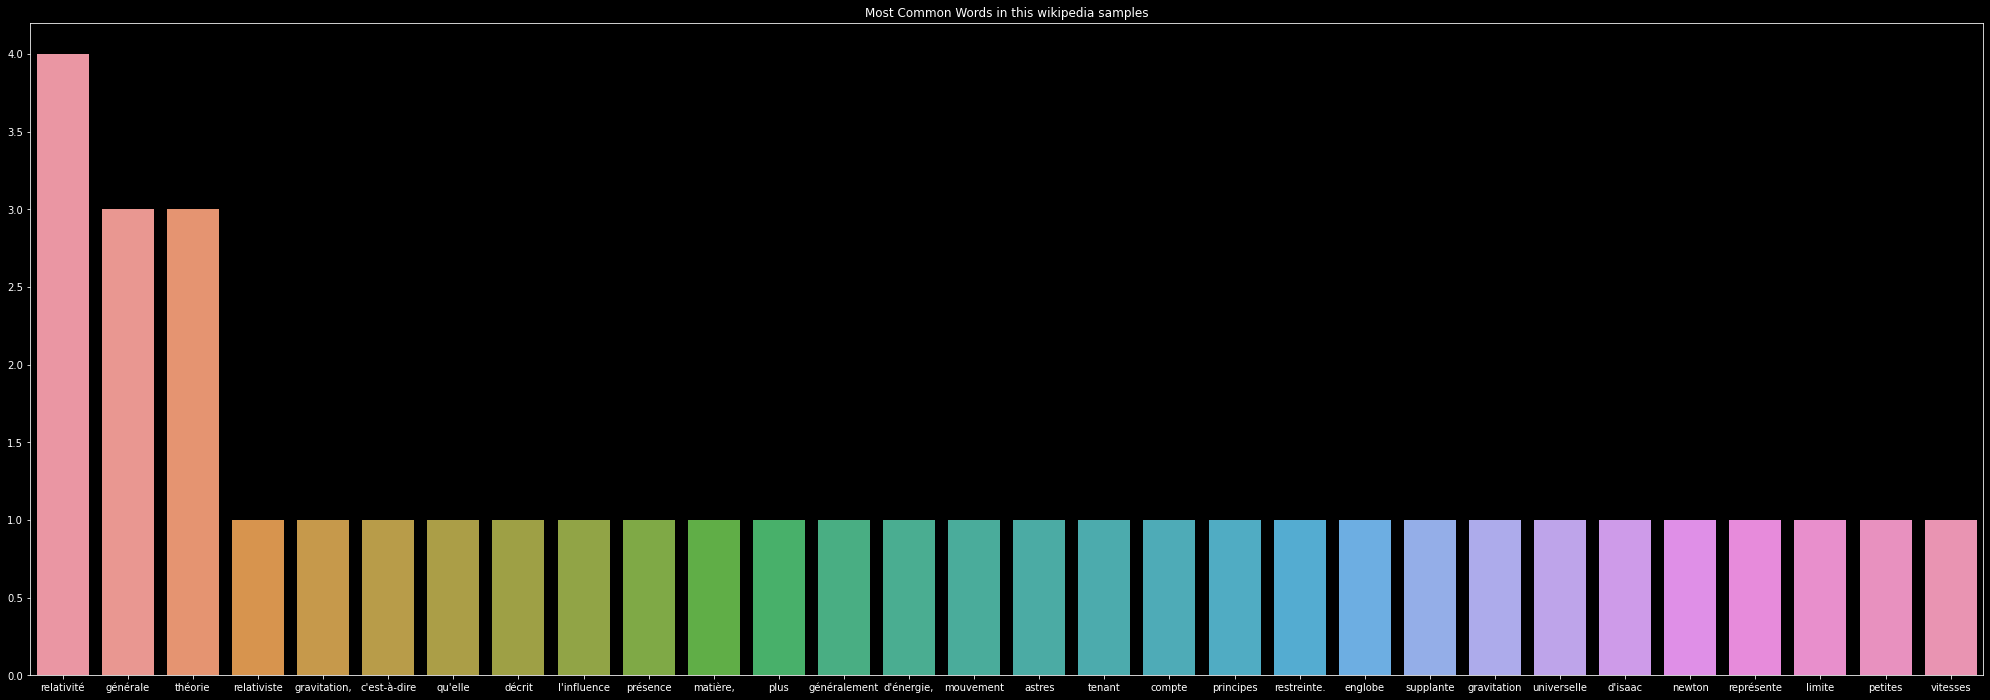

In [18]:
plt.style.use('dark_background')
plt.figure(figsize=(35, 12))

seaborn.barplot(x = words, y = counts)
plt.title('Most Common Words in this wikipedia samples')

# Wordcloud

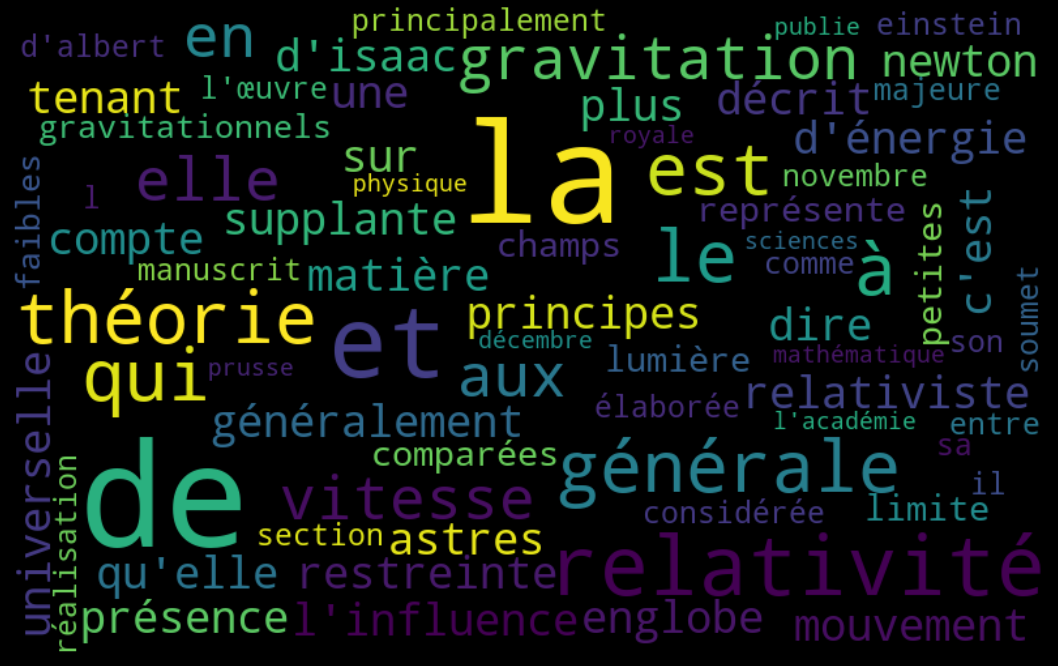

In [19]:
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(t_p.text)
plt.figure(figsize=(19, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off'); #le point virgule enleve des coordonnées qui s'affichent

sans les stopwords ...

In [20]:
text_without_stopwords = t_p.without_stopwords_concatenated()

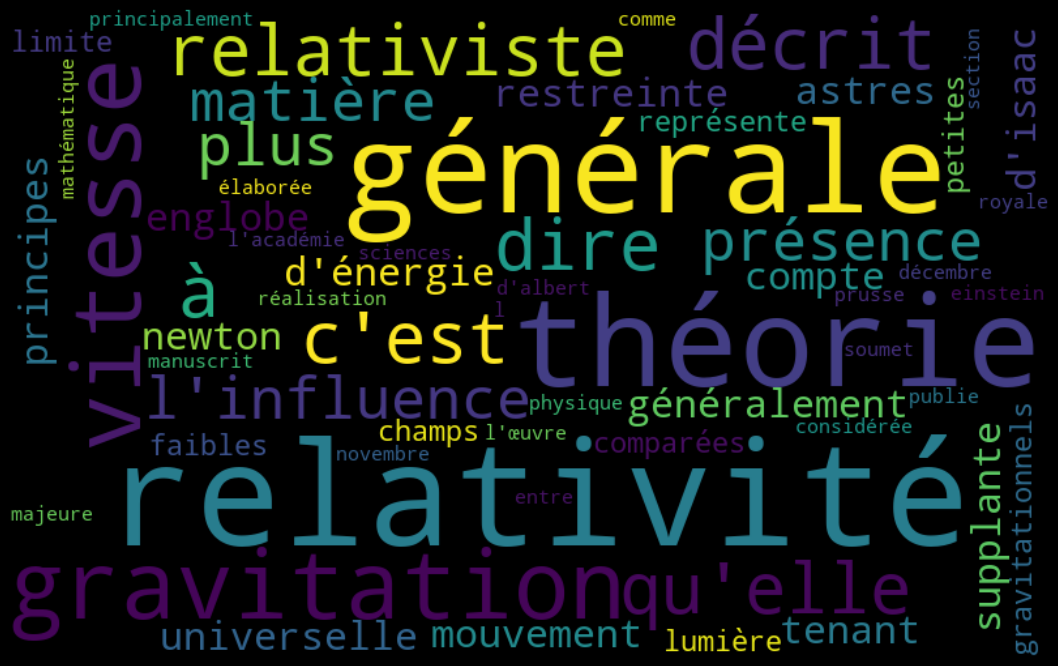

In [21]:
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(t_p.text_without_stopwords)
plt.figure(figsize=(19, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off'); #le point virgule enleve des coordonnées qui s'affichent

# Word2vec